# Dataset exploration

In this notebook we calculate and plot metrics of the annotated documents, with the objective of describing and summarizing the resulting dataset 

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas
import os
import sys

In [3]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

In [4]:
from collections import Counter

In [5]:
from imp import reload

sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../preprocess/'))

import annotated_documents
reload(annotated_documents)
import arg_docs2conll
reload(arg_docs2conll)

import read_annotations
reload(read_annotations);

In [6]:
ANNOTATIONS_DIR = '/home/milagro/am/third_party/brat-v1.3_Crunchy_Frog/data/'
ANNOTATORS = {
    'mili': {'dirname': 'judgements-mili'},
    'laura': {'dirname': 'judgements-laura'},
    # 'serena': {'dirname': 'judgements-serena'},
    'cristian': {'dirname': 'judgements-cristian'}
}

In [7]:
_, documents = read_annotations.get_annotated_documents(
    ANNOTATIONS_DIR, ANNOTATORS, factory=arg_docs2conll.AnnotatedJudgementFactory)

In [8]:
doc_stats = pandas.DataFrame(
    index=[document.identifier for document in documents.values()],
    columns=[
        'Tokens', 'Labeled Words', 'Claims', 'Premises', 'Major claims',
        'Components', 'Relations'])

def get_statistics(document):
    id = document.identifier
    words, labels = document.get_word_label_list()
    doc_stats.loc[id]['Tokens'] = len(words)
    doc_stats.loc[id]['Labeled Words'] = len(
        [label for label in labels if label != document.default_label])
    counts = Counter(labels)
    doc_stats.loc[id]['Claims'] = counts['claim']
    doc_stats.loc[id]['Major claims'] = counts['major-claim']
    doc_stats.loc[id]['Premises'] = counts['premise']
    doc_stats.loc[id]['Components'] = len(document.annotated_components)
    doc_stats.loc[id]['Relations'] = len(document.annotated_relations)

for document in documents.values():
    get_statistics(document)

In [9]:
doc_stats

,Tokens,Labeled Words,Claims,Premises,Major claims,Components,Relations
Case: ALKASI v. TURKEY - Ann: C,2810,1381,342,947,92,42,34
Case: ALKASI v. TURKEY - Ann: L,2810,1471,491,813,167,56,43


Average span of components

Average span of relations



In [22]:
pandas.DataFrame.add?

In [49]:
component_stats = pandas.DataFrame(columns=[
    'Document', 'Label', 'Span', 'Start', 'End', 'Paragraph', 'Section'])

def get_component_stats(document):
    id = document.identifier
    words, labels = document.get_word_label_list()
    previous_component = document.default_label
    component_lenght = 0
    component = 0
    for sentence in document.sentences:
        for word, label in zip(sentence.words, sentence.labels):
            if label == previous_component:  # No new component
                component_lenght += 1
            else:
                serie = pandas.Series({
                    'Document': id,
                    'Label': previous_component,
                    'Span': component_lenght,
                    'Paragraph': sentence.paragraph_number,
                    'Section': sentence.section
                })
                component_stats.loc[len(component_stats)] = serie
                component += 1
                component_lenght = 0
                previous_component = label
            
for document in documents.values():
    get_component_stats(document)

In [50]:
component_stats

,Document,Label,Span,Start,End,Paragraph,Section
0,Case: ALKASI v. TURKEY - Ann: C,O,302,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
1,Case: ALKASI v. TURKEY - Ann: C,premise,4,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
2,Case: ALKASI v. TURKEY - Ann: C,O,4,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
3,Case: ALKASI v. TURKEY - Ann: C,claim,25,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
4,Case: ALKASI v. TURKEY - Ann: C,O,2,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
5,Case: ALKASI v. TURKEY - Ann: C,premise,18,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
6,Case: ALKASI v. TURKEY - Ann: C,O,3,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
7,Case: ALKASI v. TURKEY - Ann: C,major-claim,30,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
8,Case: ALKASI v. TURKEY - Ann: C,O,3,NaN,NaN,21,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION
9,Case: ALKASI v. TURKEY - Ann: C,claim,23,NaN,NaN,22,ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION


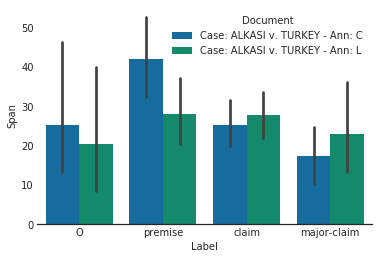

In [35]:
sns.barplot(x="Label", y="Span", hue='Document', data=component_stats)
sns.despine(left=True)

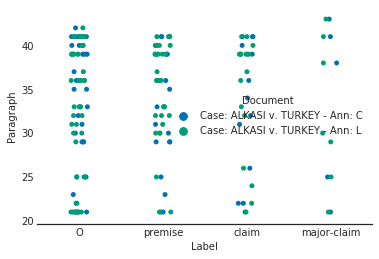

In [53]:
sns.stripplot(x='Label', y='Paragraph', hue='Document', data=component_stats, jitter=True)
sns.despine(left=True)

In [55]:
component_stats.groupby(['Document', 'Section']).count()

Label  \
Document                        Section                                                   
Case: ALKASI v. TURKEY - Ann: C ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION     14   
                                Admissibility                                        29   
                                Merits                                               28   
                                The parties’ submissions                              6   
Case: ALKASI v. TURKEY - Ann: L ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION     11   
                                Admissibility                                        35   
                                Merits                                               41   
                                The parties’ submissions                              6   

                                                                                  Span  \
Document                        Section                                                  
Case: ALKASI v. TURKEY - Ann: C ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION    14   
                                Admissibility                                       29   
                                Merits                                              28   
                                The parties’ submissions                             6   
Case: ALKASI v. TURKEY - Ann: L ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION    11   
                                Admissibility                                       35   
                                Merits                                              41   
                                The parties’ submissions                             6   

                                                                                  Start  \
Document                        Section                                                   
Case: ALKASI v. TURKEY - Ann: C ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION      0   
                                Admissibility                                         0   
                                Merits                                                0   
                                The parties’ submissions                              0   
Case: ALKASI v. TURKEY - Ann: L ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION      0   
                                Admissibility                                         0   
                                Merits                                                0   
                                The parties’ submissions                              0   

                                                                                  End  \
Document                        Section                                                 
Case: ALKASI v. TURKEY - Ann: C ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION    0   
                                Admissibility                                       0   
                                Merits                                              0   
                                The parties’ submissions                            0   
Case: ALKASI v. TURKEY - Ann: L ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION    0   
                                Admissibility                                       0   
                                Merits                                              0   
                                The parties’ submissions                            0   

                                                                                  Paragraph  
Document                        Section                                                      
Case: ALKASI v. TURKEY - Ann: C ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTION         14  
                                Admissibility                                            29  
                                Merits                                                   28 

In [ ]:
sns.barplot(x="Section", y="Span", hue='Label', data=component_stats)
sns.despine(left=True)